<a href="https://colab.research.google.com/github/terrydlek/first-project/blob/master/%EC%BA%A1%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L "https://app.roboflow.com/ds/KW6wA4IZ8s?key=x13pgjRhSM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2441      0 --:--:-- --:--:-- --:--:--  2441
100 5552k  100 5552k    0     0  7920k      0 --:--:-- --:--:-- --:--:-- 7920k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/13_jpg.rf.1be4ad9b5cf9ccef9bbf2cf2b033b6ea.jpg  
 extracting: test/images/16_jpg.rf.7db19f7f092295003994bb20f37a6d71.jpg  
 extracting: test/images/18_jpg.rf.8bdc316f5213ba35c96c3250a8cd35cb.jpg  
 extracting: test/images/1_png_jpg.rf.8832bbf96e85953ef0349f58a7ddfe2e.jpg  
 extracting: test/images/20_jpg.rf.763bf9da532c8723c1652fd0179e0ccb.jpg  
 extracting: test/images/26_jpg.rf.c8092bca2ddd8419f9046eba4b817eca.jpg  
 extracting: test/images/Unknown-10_jpg.rf.4785deef0bfe

In [ ]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14566, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 14566 (delta 84), reused 116 (delta 71), pack-reused 14430
Receiving objects: 100% (14566/14566), 13.50 MiB | 29.47 MiB/s, done.
Resolving deltas: 100% (10061/10061), done.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 


In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['insea', 'outsea']

roboflow:
  workspace: project
  project: dadas-bgm1b
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project/dadas-bgm1b/dataset/1

In [ ]:
#클래스 개수를 num_classes에 대입
import yaml
with open("/content/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 111 --batch 5 --epochs 100 --data '../data.yaml' --cfg /content/yolov5/models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=/content/yolov5/models/yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=5, imgsz=111, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 111 --conf 0.4 --source ../test/images

detect: weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[111, 111], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [111, 111] must be multiple of max stride 32, updating to [128, 128]
image 1/11 /content/test/images/13_jpg.rf.1be4ad9b5cf9ccef9bbf2cf2b033b6ea.jpg: 128x128 1 outsea, 6.7ms
image 2/11 /content/test/images/16_jpg.rf.7db19f7f092295003994bb20f37a6d71.jpg: 128x128 (no detections), 7.3ms
image 3/11 /cont

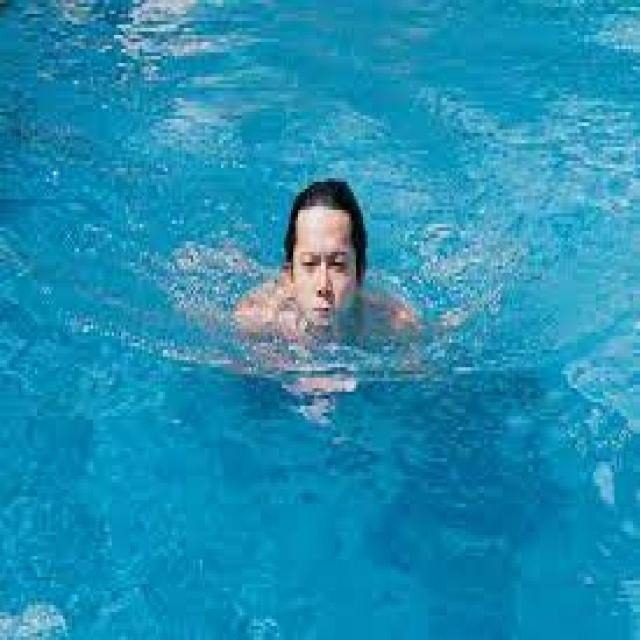

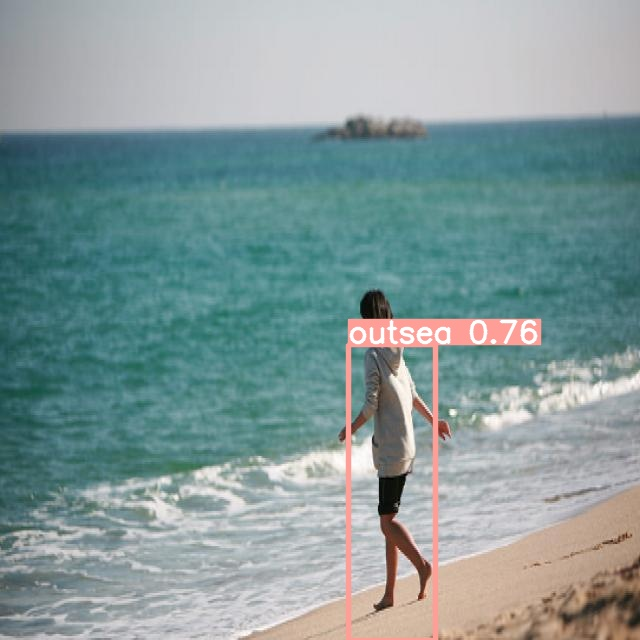

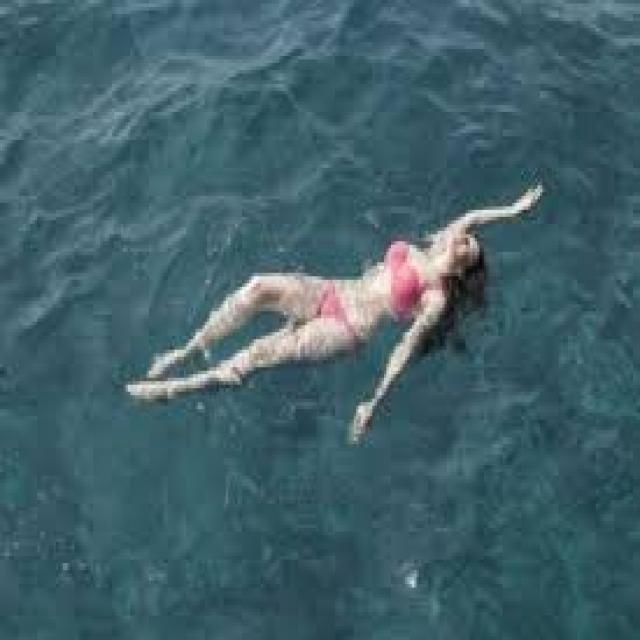

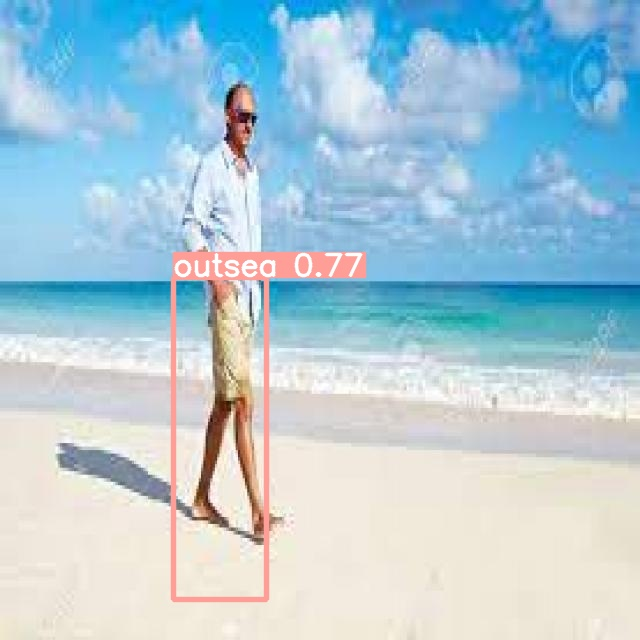

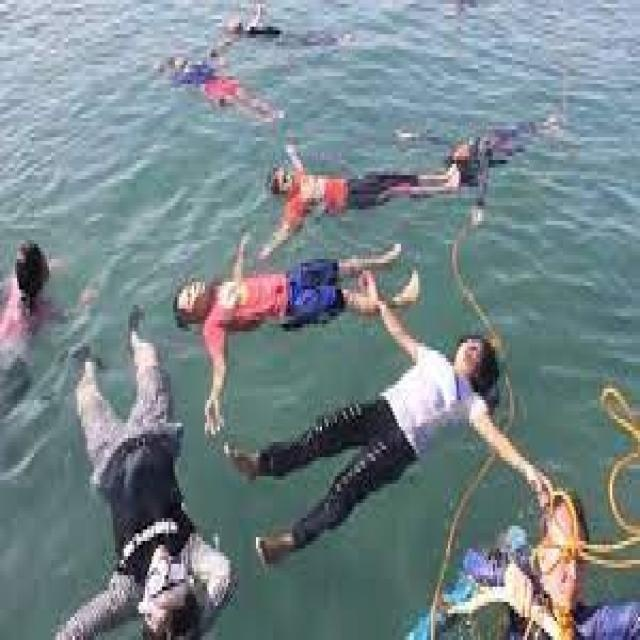

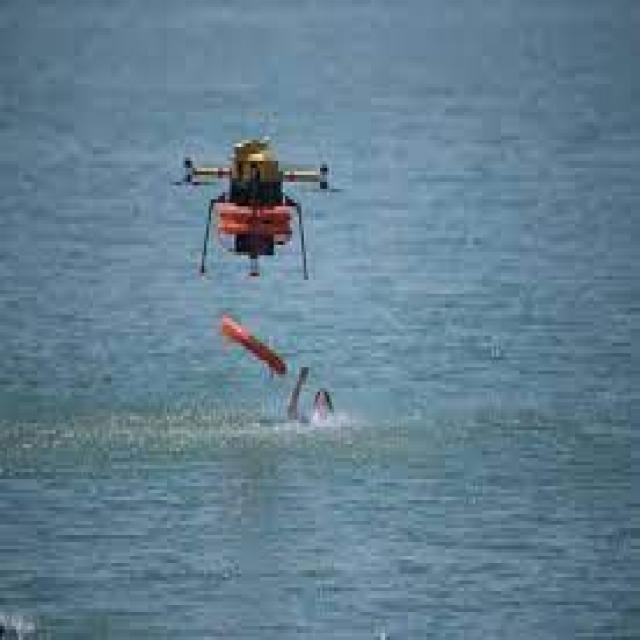

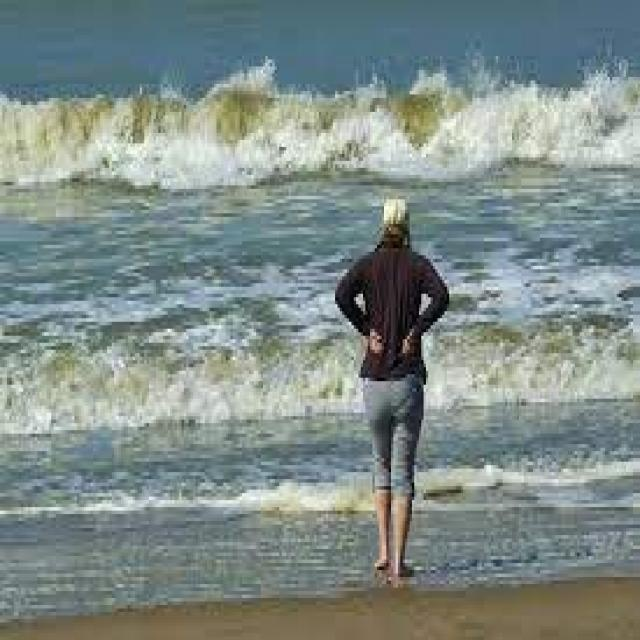

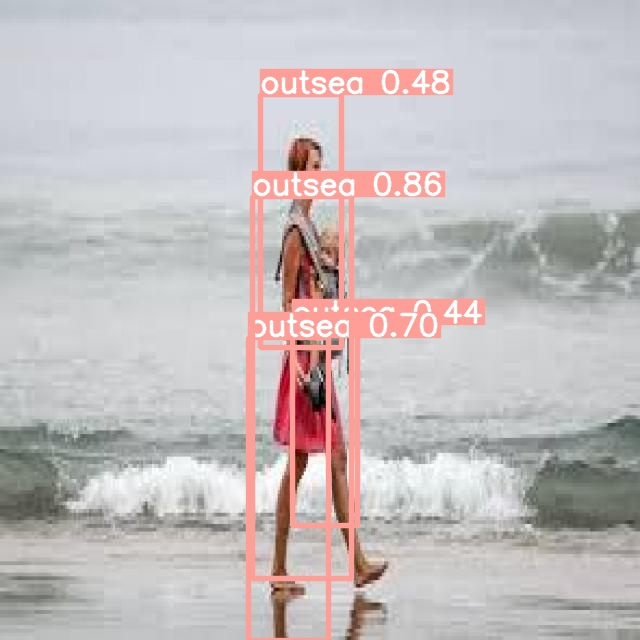

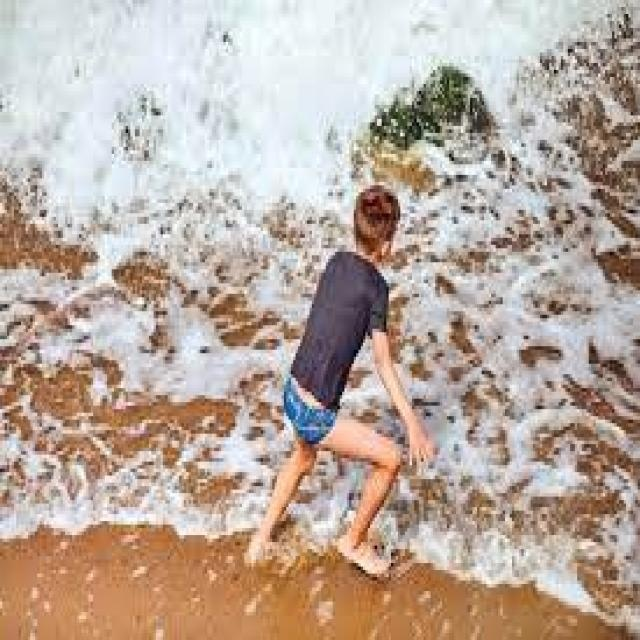

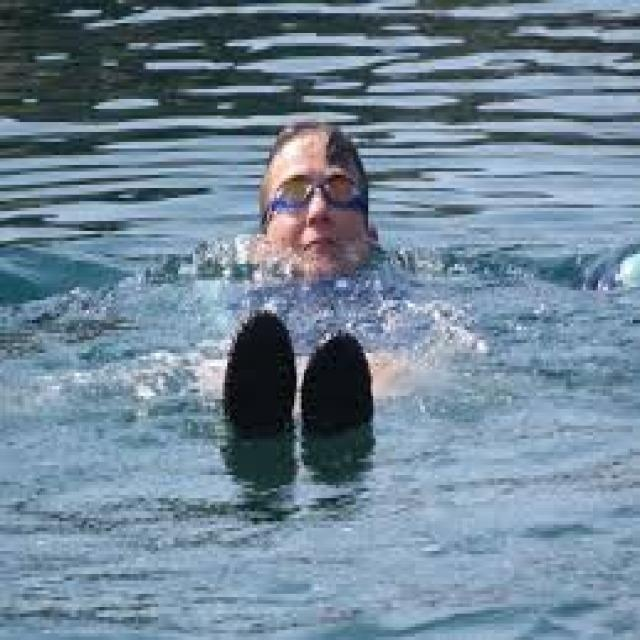

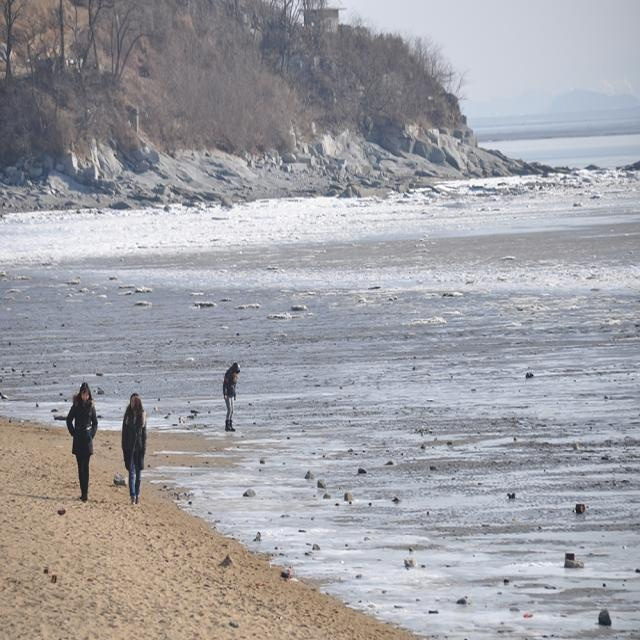

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")